In [6]:
import numpy as np
import pandas as pd
import pywt
from scipy.linalg import svd
import scipy.stats as sp_stats

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("data.csv")

# تبدیل داده‌ها به آرایه NumPy
samples = data.values

# تعیین تعداد بردارهای ویژگی مورد نیاز
num_features = 10

# تجزیه موجک داده‌ها با استفاده از تابع dwt در PyWavelets
coeffs = pywt.dwt(samples, 'haar', axis=1)

# استخراج ضرایب تقریب (low-frequency) از نتایج تجزیه موجک
approx_coeffs = coeffs[0]

# تجزیه مقادیر منفرد ضرایب تقریب با استفاده از تابع svd در NumPy
U, S, V = svd(approx_coeffs)

# محاسبه بردارهای ویژگی برای هر نمونه
feature_vectors = []
for i in range(samples.shape[0]):
    # انتخاب اولین num_features ستون از ماتریس U به عنوان بردار ویژگی از مؤلفه‌های اصلی
    principal_component_vector = U[i, :num_features]

    # استخراج ویژگی‌های آماری از بردار مؤلفه‌های اصلی
    mean = np.mean(principal_component_vector)
    variance = np.var(principal_component_vector)
    std_dev = np.std(principal_component_vector)
    skew = sp_stats.skew(principal_component_vector)

    # تشکیل بردار ویژگی با ترکیب ویژگی‌های ضرایب تقریب، مؤلفه‌های اصلی و آماری
    combined_feature_vector = np.concatenate((approx_coeffs[i], principal_component_vector, [mean, variance, std_dev, skew]))

    feature_vectors.append(combined_feature_vector)

feature_vectors = np.array(feature_vectors)

# ذخیره بردارهای ویژگی ترکیبی در فایل CSV
feature_vectors_df = pd.DataFrame(feature_vectors)
feature_vectors_df.to_csv('combined_feature_vectors.csv', index=False)


In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 25 12:30:25 2023

@author: ASUS
"""

import pandas as pd
import numpy as np

# Define the number of classes and samples per class
num_classes = 4
samples_per_class = 1500

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("combined_feature_vectors.csv")

# Create a new column for class labels
class_labels = np.repeat(np.arange(num_classes), samples_per_class)
data["Class"] = class_labels[:data.shape[0]]

# Shuffle the rows of the DataFrame
data = data.sample(frac=1).reset_index(drop=True)

# Save the modified DataFrame to a new CSV file
data.to_csv("file_name_with_class2.csv", index=False)

In [7]:
import pandas as pd
import numpy as np

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors.csv")

# تعداد نمونه‌ها برای هر کلاس
num_samples_per_class = [249, 250, 1500, 1500]

# ایجاد ستون مقدار کلاس با استفاده از تعداد نمونه‌ها
class_labels = np.concatenate([np.full(num_samples, class_num) for class_num, num_samples in enumerate(num_samples_per_class, start=1)])

# اضافه کردن ستون مقدار کلاس به دیتاست
data['Class'] = class_labels

# ذخیره دیتاست با ستون مقدار کلاس به فایل CSV جدید
data.to_csv('combined_feature_vectors_with_class.csv', index=False)


Accuracy: 0.9871428571428571
Precision: 0.9872522781774581
Recall: 0.9871428571428571
F1 Score: 0.987072403393682


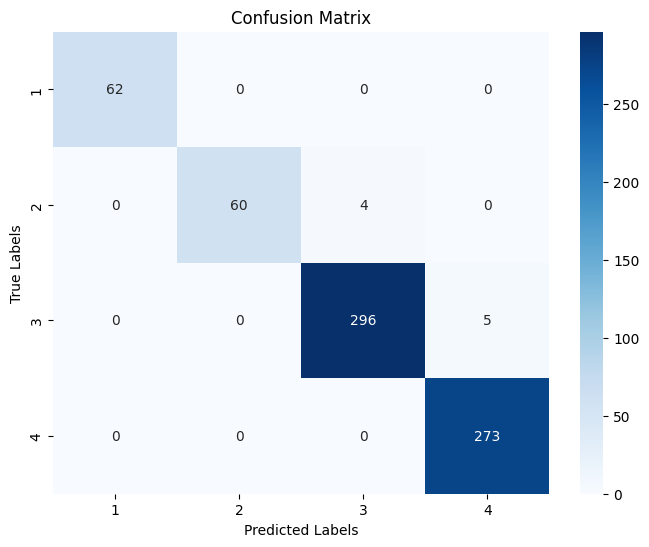

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors_with_class.csv")

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل جنگل تصادفی و آموزش آن بر روی داده‌های آموزش
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آزمون
y_pred = random_forest.predict(X_test)

# محاسبه پارامترهای ارزیابی
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# نمایش پارامترهای ارزیابی
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# نمایش ماتریس درهم‌ریختگی (Confusion Matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


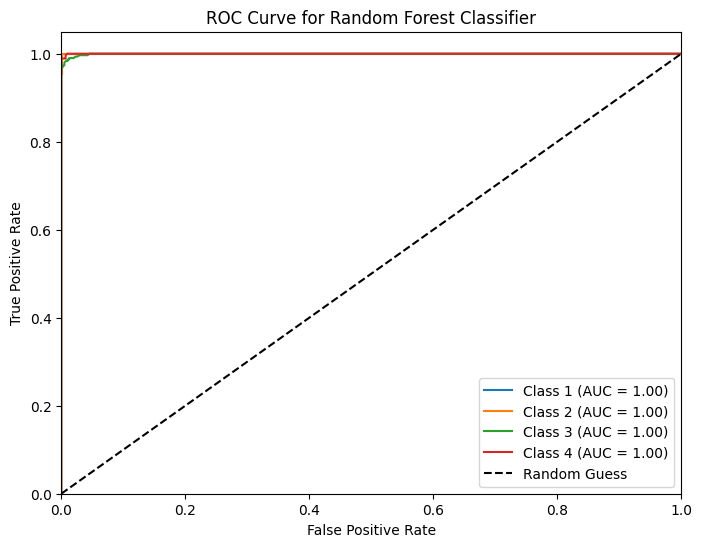

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors_with_class.csv")

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل جنگل تصادفی و آموزش آن بر روی داده‌های آموزش
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آزمون
y_pred = random_forest.predict(X_test)

# محاسبه احتمال مربوط به هر کلاس برای داده‌های آزمون
y_prob = random_forest.predict_proba(X_test)

# محاسبه نمودار ROC و AUC برای هر کلاس
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i + 1, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم نمودار ROC برای هر کلاس
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


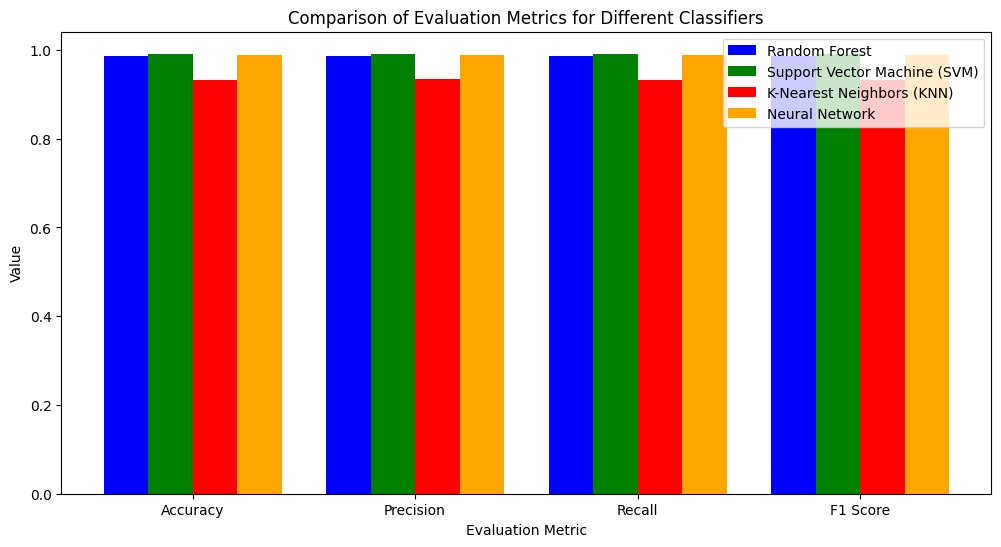

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors_with_class.csv")

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل جنگل تصادفی و آموزش آن بر روی داده‌های آموزش
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# ایجاد مدل ماشین پشتیبان و آموزش آن بر روی داده‌های آموزش
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# ایجاد مدل k-نزدیک‌ترین همسایه و آموزش آن بر روی داده‌های آموزش
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ایجاد مدل شبکه عصبی و آموزش آن بر روی داده‌های آموزش
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آزمون با هر دسته‌بند
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nn = nn.predict(X_test)

# محاسبه پارامترهای ارزیابی برای هر دسته‌بند
def calculate_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# محاسبه پارامترهای ارزیابی برای هر دسته‌بند
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_evaluation_metrics(y_test, y_pred_rf)
accuracy_svm, precision_svm, recall_svm, f1_svm = calculate_evaluation_metrics(y_test, y_pred_svm)
accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_evaluation_metrics(y_test, y_pred_knn)
accuracy_nn, precision_nn, recall_nn, f1_nn = calculate_evaluation_metrics(y_test, y_pred_nn)

# نمایش پارامترهای ارزیابی با نمودار میله‌ای
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_values = [accuracy_rf, precision_rf, recall_rf, f1_rf]
svm_values = [accuracy_svm, precision_svm, recall_svm, f1_svm]
knn_values = [accuracy_knn, precision_knn, recall_knn, f1_knn]
nn_values = [accuracy_nn, precision_nn, recall_nn, f1_nn]

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, rf_values, width, label='Random Forest', color='b')
plt.bar(x, svm_values, width, label='Support Vector Machine (SVM)', color='g')
plt.bar(x + width, knn_values, width, label='K-Nearest Neighbors (KNN)', color='r')
plt.bar(x + 2*width, nn_values, width, label='Neural Network', color='orange')
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Comparison of Evaluation Metrics for Different Classifiers')
plt.xticks(x + width/2, metrics)
plt.legend()
plt.show()



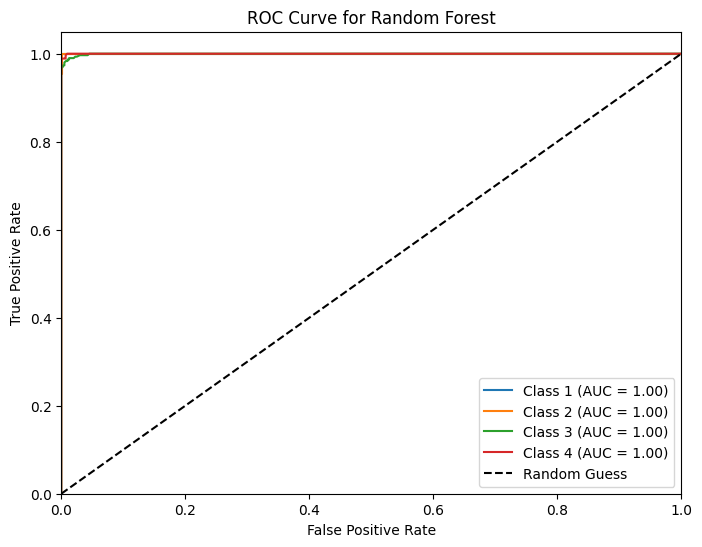

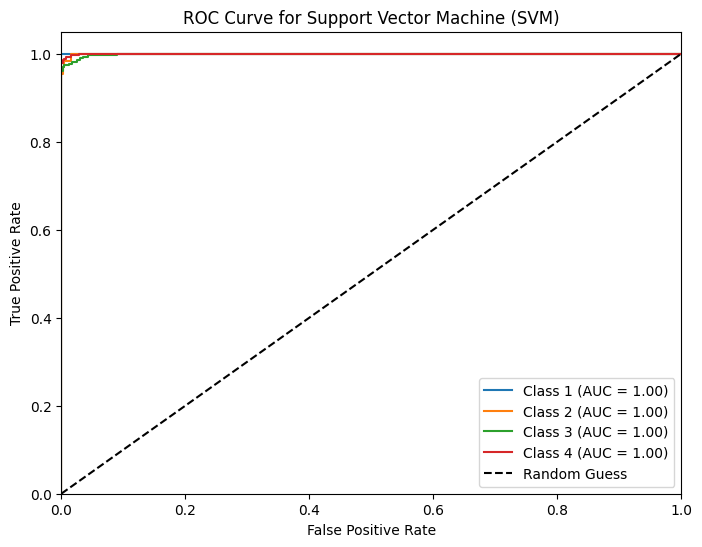

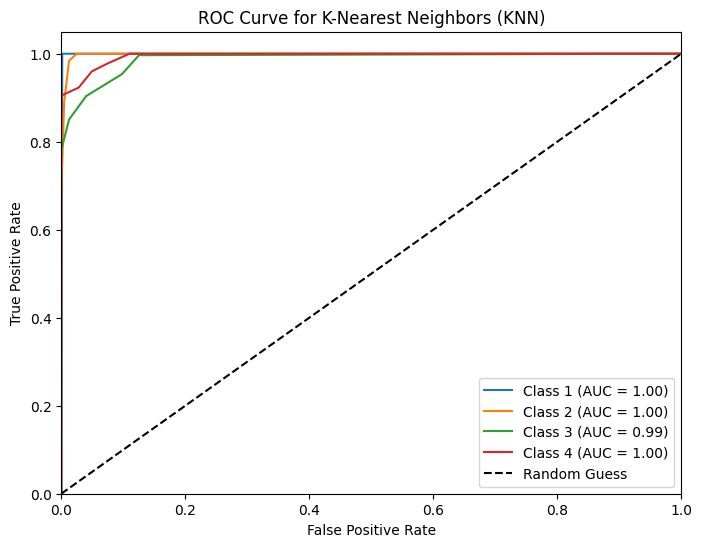

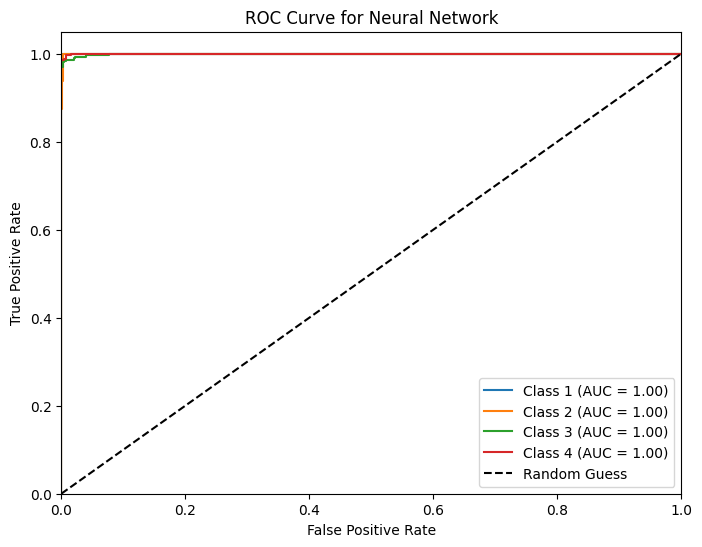

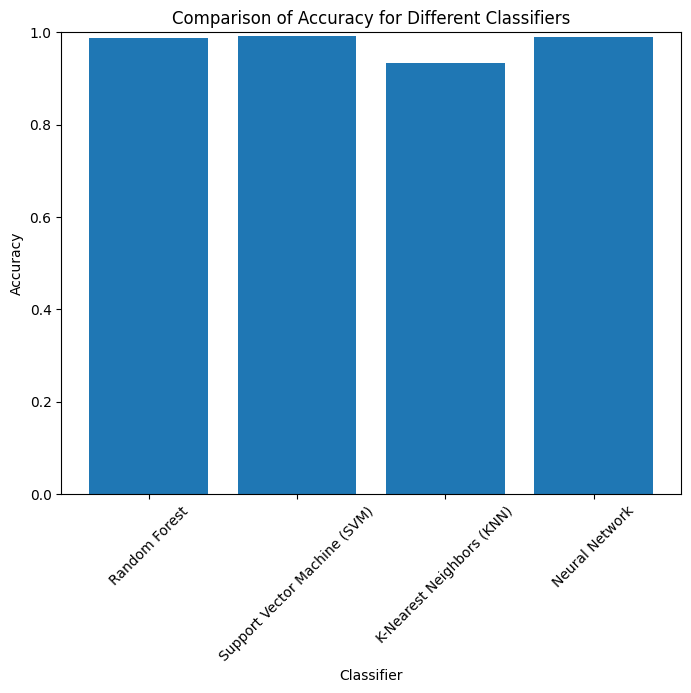

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors_with_class.csv")

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل جنگل تصادفی و آموزش آن بر روی داده‌های آموزش
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# ایجاد مدل ماشین پشتیبان و آموزش آن بر روی داده‌های آموزش
svm = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm.fit(X_train, y_train)

# ایجاد مدل k-نزدیک‌ترین همسایه و آموزش آن بر روی داده‌های آموزش
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ایجاد مدل شبکه عصبی و آموزش آن بر روی داده‌های آموزش
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آزمون با هر دسته‌بند
y_prob_rf = random_forest.predict_proba(X_test)
y_prob_svm = svm.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)
y_prob_nn = nn.predict_proba(X_test)

# محاسبه نمودار ROC و AUC برای هر دسته‌بند
def plot_roc_curve(y_true, y_prob, model_name):
    n_classes = y_prob.shape[1]
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i + 1, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i + 1, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# رسم نمودار ROC برای هر دسته‌بند
plot_roc_curve(y_test, y_prob_rf, "Random Forest")
plot_roc_curve(y_test, y_prob_svm, "Support Vector Machine (SVM)")
plot_roc_curve(y_test, y_prob_knn, "K-Nearest Neighbors (KNN)")
plot_roc_curve(y_test, y_prob_nn, "Neural Network")

# محاسبه دقت برای هر دسته‌بند
accuracy_rf = accuracy_score(y_test, random_forest.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm.predict(X_test))
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
accuracy_nn = accuracy_score(y_test, nn.predict(X_test))

# نمایش نمودار دقت برای هر دسته‌بند
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'Support Vector Machine (SVM)', 'K-Nearest Neighbors (KNN)', 'Neural Network']
accuracy_values = [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_nn]
plt.bar(models, accuracy_values)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Classifiers')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.show()


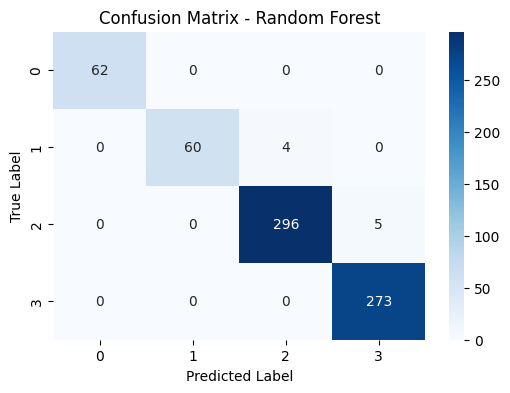

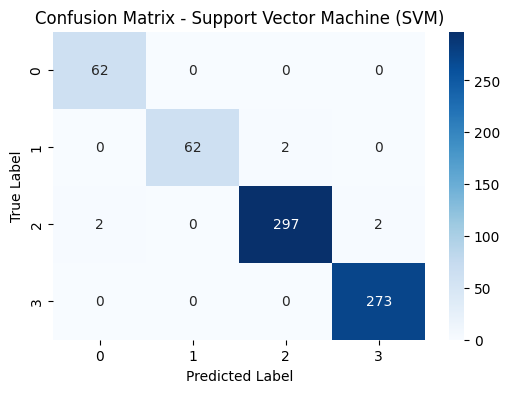

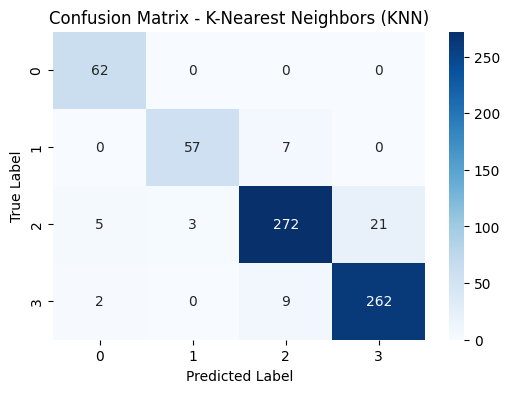

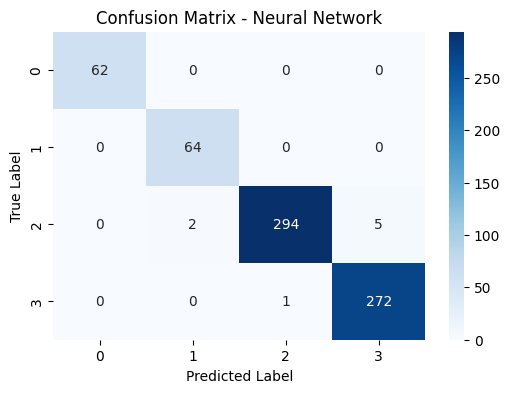

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# بارگیری داده‌ها از فایل CSV
data = pd.read_csv("combined_feature_vectors_with_class.csv")

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد مدل‌های الگوریتم‌ها و آموزش آن‌ها بر روی داده‌های آموزش
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

# تابع رسم ماتریس اشتباه
def plot_confusion_matrix(y_true, y_pred, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {algorithm_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# رسم ماتریس اشتباه برای هر الگوریتم
plot_confusion_matrix(y_test, random_forest.predict(X_test), 'Random Forest')
plot_confusion_matrix(y_test, svm.predict(X_test), 'Support Vector Machine (SVM)')
plot_confusion_matrix(y_test, knn.predict(X_test), 'K-Nearest Neighbors (KNN)')
plot_confusion_matrix(y_test, nn.predict(X_test), 'Neural Network')
